<h2>Hierarchical Equations of Motion Lower Temperature Limit</h2>

In this notebook, we look at the lower temperature limit of HEOM and the time and hierarchy level required for convergance in a two state system. 

In [3]:
import math
import cmath
import sys
import cmath
import math
import os
import h5py
import matplotlib.pyplot as plt

import numpy as np

# Libra dependancies
if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *
import util.libutil as comn

from libra_py import units
from libra_py import data_read
import libra_py.dynamics.heom.compute as compute

# For plotting
colors = {}

colors.update({"11": "#8b1a0e"})  # red
colors.update({"12": "#FF4500"})  # orangered
colors.update({"13": "#B22222"})  # firebrick
colors.update({"14": "#DC143C"})  # crimson

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue

colors.update({"41": "#2F4F4F"})  # darkslategray

clrs_index = ["11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24"]

Initial setup of the Hamiltonian, starting population density, and parameters. The only bath parameter that will vary is temperature, and KK and LL will be adjusted to reach convergance. 

In [ ]:
Ham = CMATRIX(2,2)
Ham.set(0, 0, 50.0 * units.inv_cm2Ha);    Ham.set(0, 1, 200.0 * units.inv_cm2Ha);
Ham.set(1, 0,200.0 * units.inv_cm2Ha);    Ham.set(1, 1, -50.0 * units.inv_cm2Ha);

rho = CMATRIX(2,2)
rho.set(0, 0, 1.0+0.0j)


params = { "KK":1, "LL":10,
           "gamma": 10 *(1/ units.ps2au),
           "eta": 100 * units.inv_cm2Ha,
           "temperature": 10.0,
           "el_phon_couplings":initialize_el_phonon_couplings(2),,

           "dt":0.1*units.fs2au, "nsteps":10000,
           "verbosity":-1, "progress_frequency":0.1,

           "truncation_scheme":4, "do_scale":0,
           "adm_tolerance":1e-10, "adm_deriv_tolerance":1e-15,
           "filter_after_steps":1,"do_zeroing":1,
           "num_threads":16,

           "prefix":"convergence/out_t100_KK1_LL10",
           "hdf5_output_level":0, "txt_output_level":0, "mem_output_level":3,
           "properties_to_save": [ "timestep", "time", "denmat"],
           "use_compression":0, "compression_level":[0,0,0]
         }

The compute.run_dynamics command executes the HEOM method. First it is run with the parameters given above. The parameters are updated to change KK and LL to check the convergence. 

In [ ]:
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t100_KK1_LL15", "KK": 1, "LL":15})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t100_KK2_LL10", "KK": 2, "LL":10})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t100_KK2_LL15", "KK": 2, "LL":15})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t100_KK3_LL10", "KK": 3, "LL":10})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t100_KK2_LL15", "KK": 3, "LL":15})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t100_KK3_LL10", "KK": 4, "LL":10})
compute.run_dynamics(params, Ham, rho)

The convergence is checked for temperature = 100 K. 

/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex val

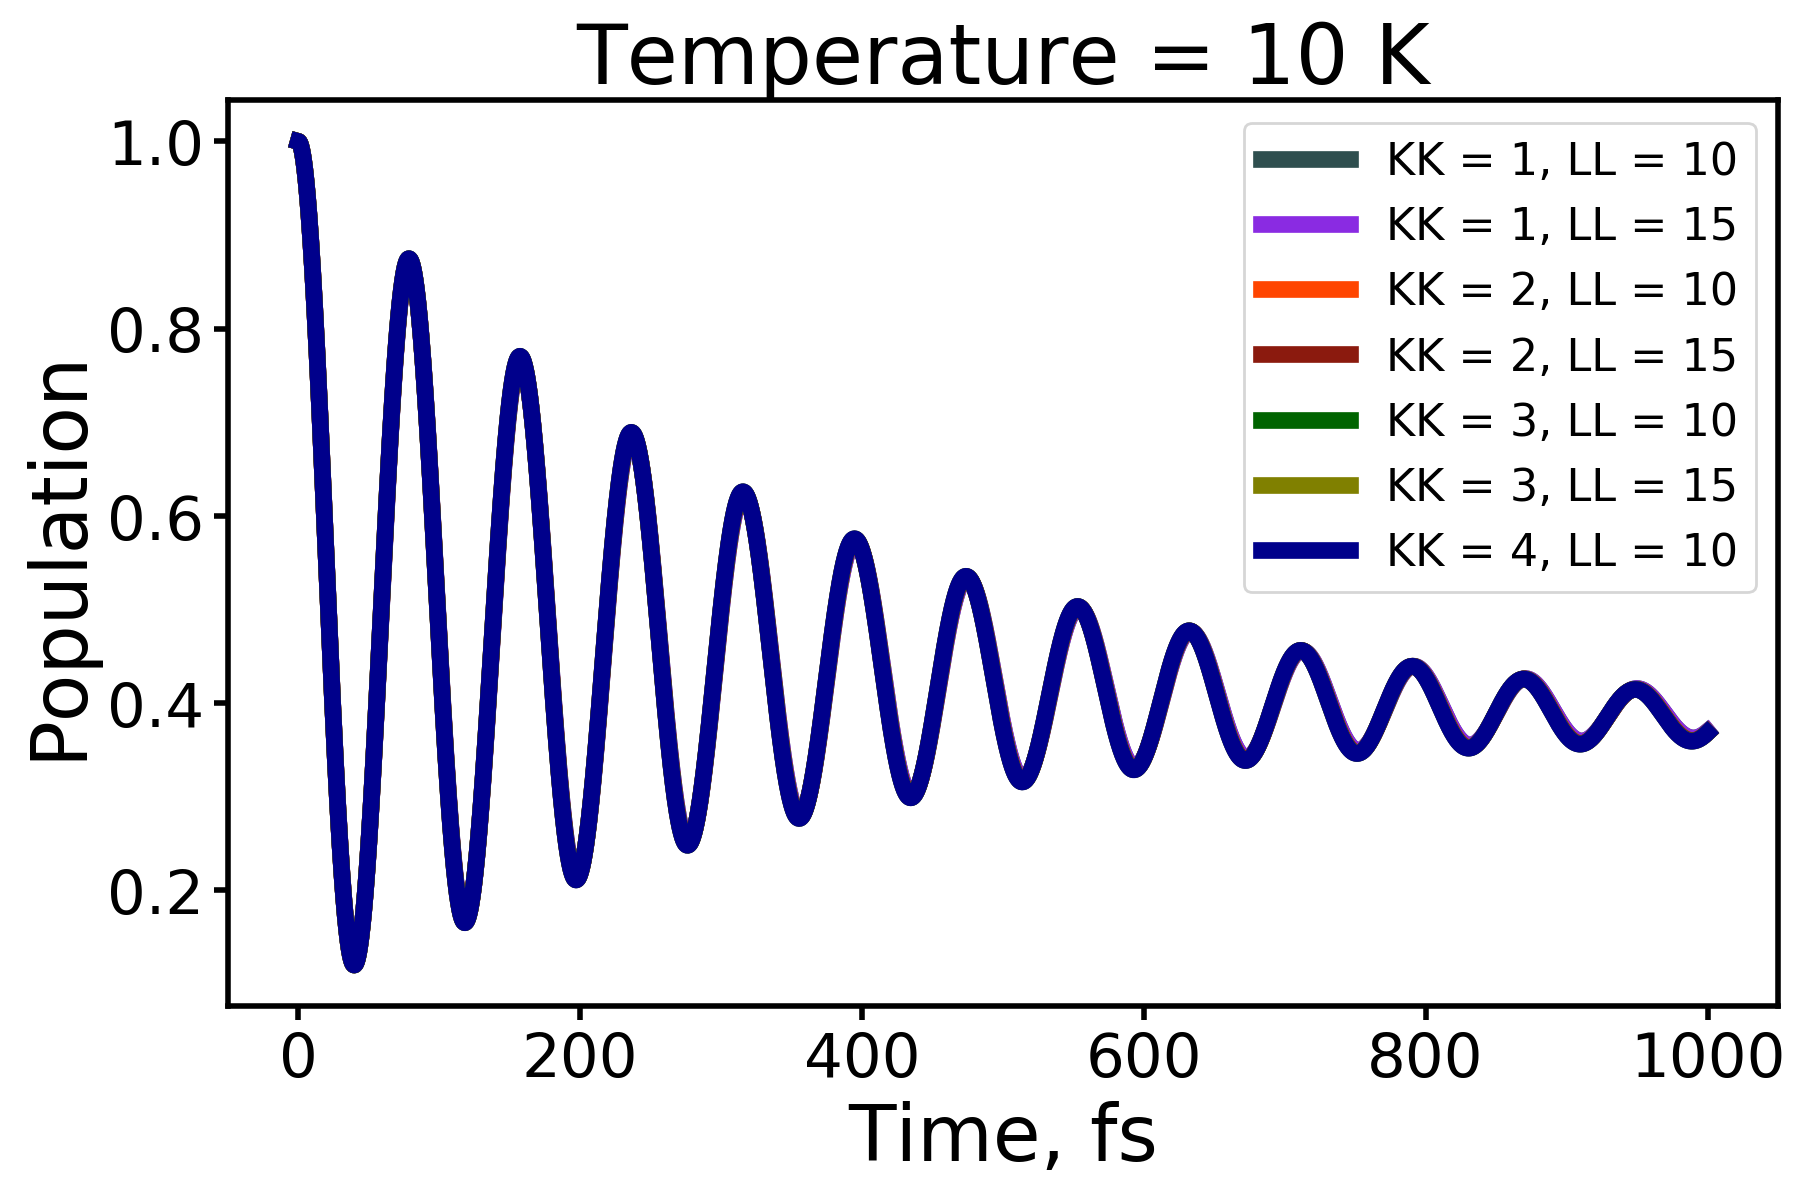

In [5]:
A = [ None, None ]

with h5py.File(F"convergence/out_t100_KK1_LL10/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"convergence/out_t100_KK1_LL15/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 0,0])

C = [ None, None ]

with h5py.File(F"convergence/out_t100_KK2_LL10/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 0,0])

D = [ None, None ]

with h5py.File(F"convergence/out_t100_KK2_LL15/mem_data.hdf", 'r') as f:
    D[0] = list(f["time/data"][:] * units.au2fs)
    D[1] = list(f["denmat/data"][:, 0,0])

    
E = [ None, None ]

with h5py.File(F"convergence/out_t100_KK3_LL10/mem_data.hdf", 'r') as f:
    E[0] = list(f["time/data"][:] * units.au2fs)
    E[1] = list(f["denmat/data"][:, 0,0])

F = [ None, None ]

with h5py.File(F"convergence/out_t100_KK3_LL15/mem_data.hdf", 'r') as f:
    F[0] = list(f["time/data"][:] * units.au2fs)
    F[1] = list(f["denmat/data"][:, 0,0])

    
G = [ None, None ]

with h5py.File(F"convergence/out_t100_KK4_LL10/mem_data.hdf", 'r') as f:
    G[0] = list(f["time/data"][:] * units.au2fs)
    G[1] = list(f["denmat/data"][:, 0,0])

plt.figure(1, figsize=(10, 6), dpi=200)
plt.subplot(1,1,1)
ax = plt.gca()
plt.title('Temperature = 10 K', fontsize=30)
plt.xlabel('Time, fs',fontsize=28)
plt.ylabel('Population',fontsize=28)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(length=5, width=2, labelsize=22)
plt.plot(A[0], A[1], label="KK = 1, LL = 10", linewidth=6, color = colors["41"])
plt.plot(B[0], B[1], label="KK = 1, LL = 15", linewidth=6, color = colors["31"])
plt.plot(C[0], C[1], label="KK = 2, LL = 10", linewidth=6, color = colors["12"])
plt.plot(D[0], D[1], label="KK = 2, LL = 15", linewidth=6, color = colors["11"])
plt.plot(E[0], E[1], label="KK = 3, LL = 10", linewidth=6, color = colors["22"])
plt.plot(F[0], F[1], label="KK = 3, LL = 15", linewidth=6, color = colors["24"])
plt.plot(G[0], G[1], label="KK = 4, LL = 10", linewidth=6, color = colors["32"])
plt.legend(fontsize=16, loc='upper right')
plt.show()
plt.close()

We repeat as above for temperatures 50 K, 25 K, and 10 K. 

In [ ]:
params.update({"prefix":"convergence/out_t50_KK1_LL10", "temperature":50, "KK": 1, "LL":10})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t50_KK1_LL15", "KK": 1, "LL":15})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t50_KK2_LL10", "KK": 2, "LL":10})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t50_KK2_LL15", "KK": 2, "LL":15})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t50_KK3_LL10", "KK": 3, "LL":10})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t50_KK2_LL15", "KK": 3, "LL":15})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t50_KK3_LL10", "KK": 4, "LL":10})
compute.run_dynamics(params, Ham, rho)

/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex val

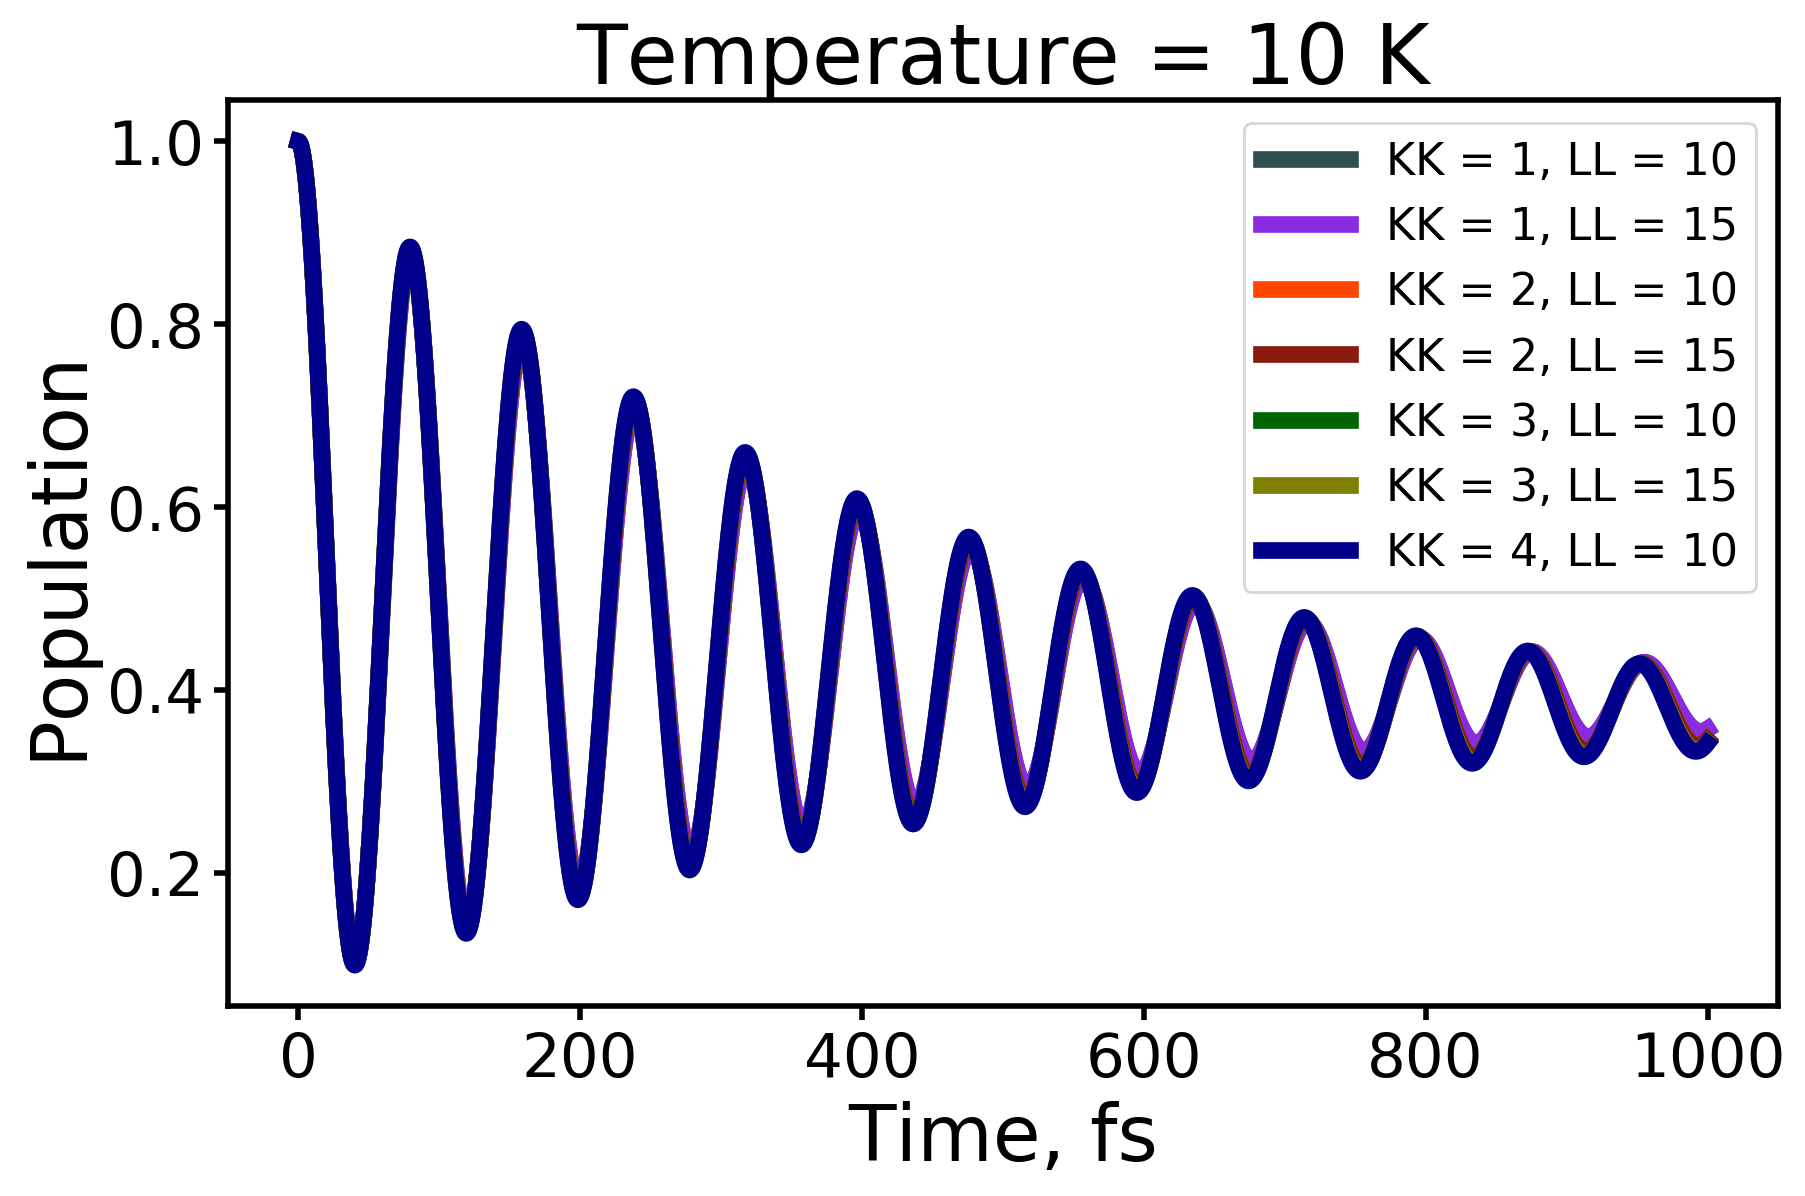

In [6]:
A = [ None, None ]

with h5py.File(F"convergence/out_t50_KK1_LL10/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"convergence/out_t50_KK1_LL15/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 0,0])

C = [ None, None ]

with h5py.File(F"convergence/out_t50_KK2_LL10/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 0,0])

D = [ None, None ]

with h5py.File(F"convergence/out_t50_KK2_LL15/mem_data.hdf", 'r') as f:
    D[0] = list(f["time/data"][:] * units.au2fs)
    D[1] = list(f["denmat/data"][:, 0,0])

    
E = [ None, None ]

with h5py.File(F"convergence/out_t50_KK3_LL10/mem_data.hdf", 'r') as f:
    E[0] = list(f["time/data"][:] * units.au2fs)
    E[1] = list(f["denmat/data"][:, 0,0])

F = [ None, None ]

with h5py.File(F"convergence/out_t50_KK3_LL15/mem_data.hdf", 'r') as f:
    F[0] = list(f["time/data"][:] * units.au2fs)
    F[1] = list(f["denmat/data"][:, 0,0])

    
G = [ None, None ]

with h5py.File(F"convergence/out_t50_KK4_LL10/mem_data.hdf", 'r') as f:
    G[0] = list(f["time/data"][:] * units.au2fs)
    G[1] = list(f["denmat/data"][:, 0,0])

plt.figure(1, figsize=(10, 6), dpi=200)
plt.subplot(1,1,1)
ax = plt.gca()
plt.title('Temperature = 10 K', fontsize=30)
plt.xlabel('Time, fs',fontsize=28)
plt.ylabel('Population',fontsize=28)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(length=5, width=2, labelsize=22)
plt.plot(A[0], A[1], label="KK = 1, LL = 10", linewidth=6, color = colors["41"])
plt.plot(B[0], B[1], label="KK = 1, LL = 15", linewidth=6, color = colors["31"])
plt.plot(C[0], C[1], label="KK = 2, LL = 10", linewidth=6, color = colors["12"])
plt.plot(D[0], D[1], label="KK = 2, LL = 15", linewidth=6, color = colors["11"])
plt.plot(E[0], E[1], label="KK = 3, LL = 10", linewidth=6, color = colors["22"])
plt.plot(F[0], F[1], label="KK = 3, LL = 15", linewidth=6, color = colors["24"])
plt.plot(G[0], G[1], label="KK = 4, LL = 10", linewidth=6, color = colors["32"])
plt.legend(fontsize=16, loc='upper right')
plt.show()
plt.close()

In [ ]:
params.update({"prefix":"convergence/out_t25_KK1_LL10", "temperature":25, "KK": 1, "LL":10})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t25_KK1_LL15", "KK": 1, "LL":15})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t25_KK2_LL10", "KK": 2, "LL":10})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t25_KK2_LL15", "KK": 2, "LL":15})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t25_KK3_LL10", "KK": 3, "LL":10})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t25_KK2_LL15", "KK": 3, "LL":15})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t25_KK3_LL10", "KK": 4, "LL":10})
compute.run_dynamics(params, Ham, rho)

/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex val

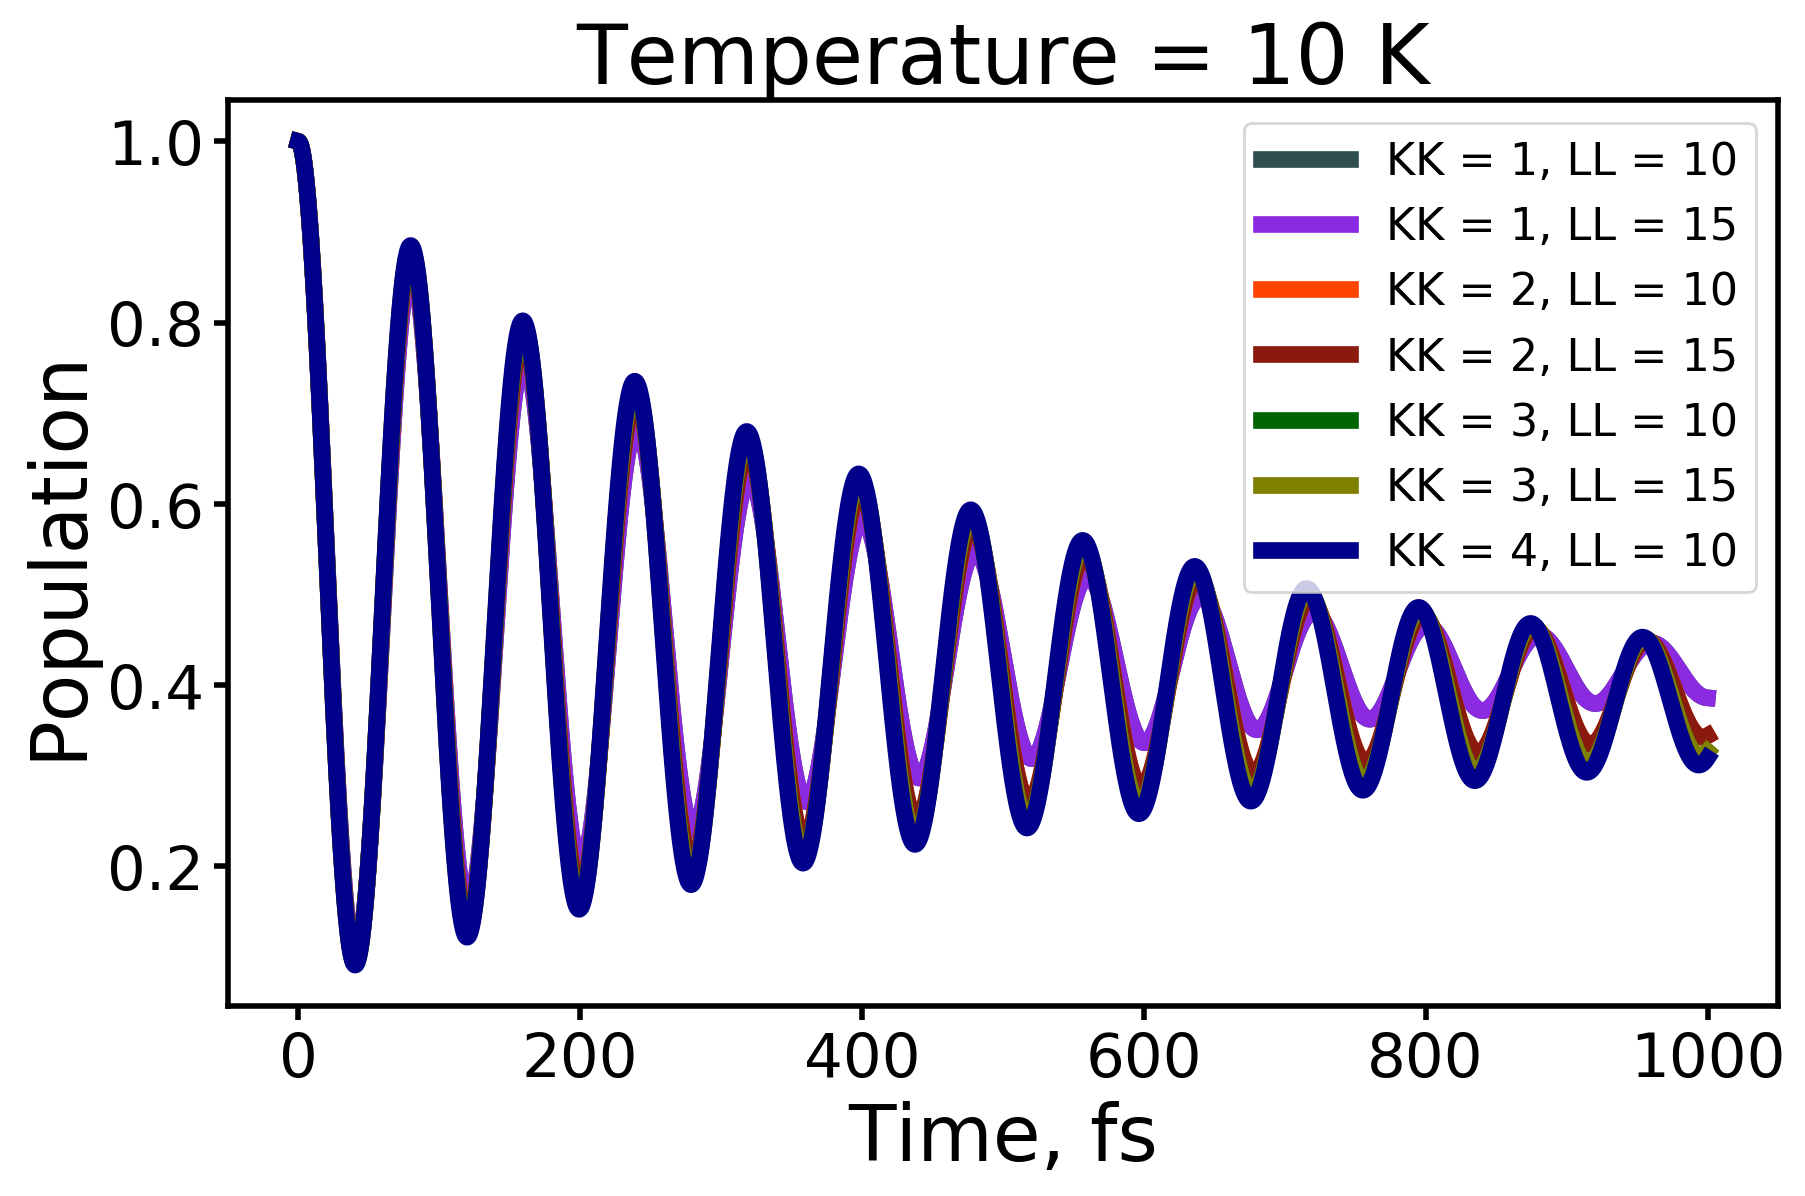

In [12]:
A = [ None, None ]

with h5py.File(F"convergence/out_t25_KK1_LL10/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"convergence/out_t25_KK1_LL15/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 0,0])

C = [ None, None ]

with h5py.File(F"convergence/out_t25_KK2_LL10/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 0,0])

D = [ None, None ]

with h5py.File(F"convergence/out_t25_KK2_LL15/mem_data.hdf", 'r') as f:
    D[0] = list(f["time/data"][:] * units.au2fs)
    D[1] = list(f["denmat/data"][:, 0,0])

    
E = [ None, None ]

with h5py.File(F"convergence/out_t25_KK3_LL10/mem_data.hdf", 'r') as f:
    E[0] = list(f["time/data"][:] * units.au2fs)
    E[1] = list(f["denmat/data"][:, 0,0])

F = [ None, None ]

with h5py.File(F"convergence/out_t25_KK3_LL15/mem_data.hdf", 'r') as f:
    F[0] = list(f["time/data"][:] * units.au2fs)
    F[1] = list(f["denmat/data"][:, 0,0])

    
G = [ None, None ]

with h5py.File(F"convergence/out_t25_KK4_LL10/mem_data.hdf", 'r') as f:
    G[0] = list(f["time/data"][:] * units.au2fs)
    G[1] = list(f["denmat/data"][:, 0,0])

plt.figure(1, figsize=(10, 6), dpi=200)
plt.subplot(1,1,1)
ax = plt.gca()
plt.title('Temperature = 10 K', fontsize=30)
plt.xlabel('Time, fs',fontsize=28)
plt.ylabel('Population',fontsize=28)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(length=5, width=2, labelsize=22)
plt.plot(A[0], A[1], label="KK = 1, LL = 10", linewidth=6, color = colors["41"])
plt.plot(B[0], B[1], label="KK = 1, LL = 15", linewidth=6, color = colors["31"])
plt.plot(C[0], C[1], label="KK = 2, LL = 10", linewidth=6, color = colors["12"])
plt.plot(D[0], D[1], label="KK = 2, LL = 15", linewidth=6, color = colors["11"])
plt.plot(E[0], E[1], label="KK = 3, LL = 10", linewidth=6, color = colors["22"])
plt.plot(F[0], F[1], label="KK = 3, LL = 15", linewidth=6, color = colors["24"])
plt.plot(G[0], G[1], label="KK = 4, LL = 10", linewidth=6, color = colors["32"])
plt.legend(fontsize=16, loc='upper right')
plt.show()
plt.close()

In [ ]:
params.update({"prefix":"convergence/out_t10_KK1_LL10", "temperature":10, "KK": 1, "LL":10})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t10_KK1_LL15", "KK": 1, "LL":15})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t10_KK2_LL10", "KK": 2, "LL":10})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t10_KK2_LL15", "KK": 2, "LL":15})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t10_KK3_LL10", "KK": 3, "LL":10})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t10_KK3_LL15", "KK": 2, "LL":15})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t10_KK4_LL10", "KK": 3, "LL":10})
compute.run_dynamics(params, Ham, rho)


/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex val

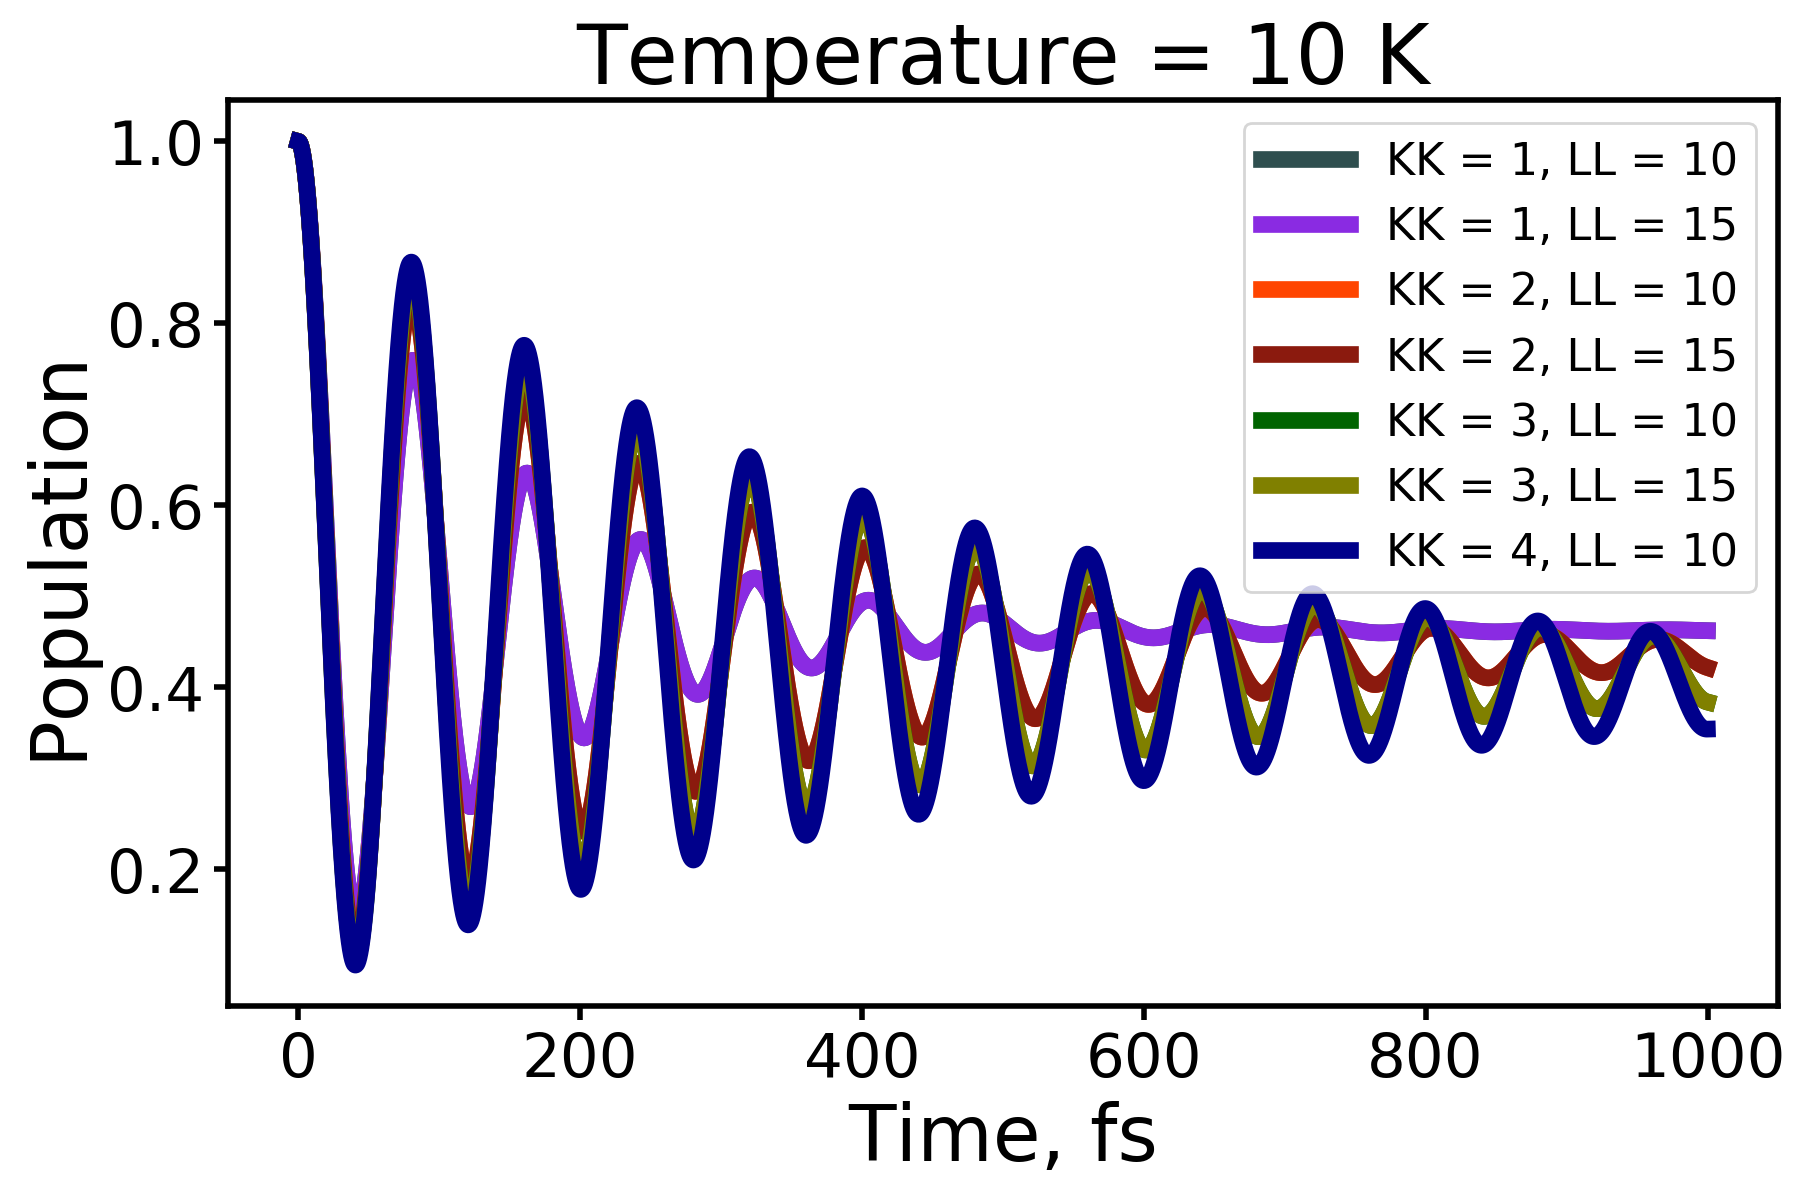

In [8]:
A = [ None, None ]

with h5py.File(F"convergence/out_t10_KK1_LL10/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"convergence/out_t10_KK1_LL15/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 0,0])

C = [ None, None ]

with h5py.File(F"convergence/out_t10_KK2_LL10/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 0,0])

D = [ None, None ]

with h5py.File(F"convergence/out_t10_KK2_LL15/mem_data.hdf", 'r') as f:
    D[0] = list(f["time/data"][:] * units.au2fs)
    D[1] = list(f["denmat/data"][:, 0,0])

    
E = [ None, None ]

with h5py.File(F"convergence/out_t10_KK3_LL10/mem_data.hdf", 'r') as f:
    E[0] = list(f["time/data"][:] * units.au2fs)
    E[1] = list(f["denmat/data"][:, 0,0])
    
F = [ None, None ]

with h5py.File(F"convergence/out_t10_KK3_LL15/mem_data.hdf", 'r') as f:
    F[0] = list(f["time/data"][:] * units.au2fs)
    F[1] = list(f["denmat/data"][:, 0,0])

    
G = [ None, None ]

with h5py.File(F"convergence/out_t10_KK4_LL10/mem_data.hdf", 'r') as f:
    G[0] = list(f["time/data"][:] * units.au2fs)
    G[1] = list(f["denmat/data"][:, 0,0])

plt.figure(1, figsize=(10, 6), dpi=200)
plt.subplot(1,1,1)
ax = plt.gca()
plt.title('Temperature = 10 K', fontsize=30)
plt.xlabel('Time, fs',fontsize=28)
plt.ylabel('Population',fontsize=28)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(length=5, width=2, labelsize=22)
plt.plot(A[0], A[1], label="KK = 1, LL = 10", linewidth=6, color = colors["41"])
plt.plot(B[0], B[1], label="KK = 1, LL = 15", linewidth=6, color = colors["31"])
plt.plot(C[0], C[1], label="KK = 2, LL = 10", linewidth=6, color = colors["12"])
plt.plot(D[0], D[1], label="KK = 2, LL = 15", linewidth=6, color = colors["11"])
plt.plot(E[0], E[1], label="KK = 3, LL = 10", linewidth=6, color = colors["22"])
plt.plot(F[0], F[1], label="KK = 3, LL = 15", linewidth=6, color = colors["24"])
plt.plot(G[0], G[1], label="KK = 4, LL = 10", linewidth=6, color = colors["32"])
plt.legend(fontsize=16, loc='upper right')
plt.show()
plt.close()

We also look at the convergence for using the unscaled algorithm, `"do_scale":0`, at a low temperature. 

In [ ]:
params.update({"prefix":"convergence/out_t10_unscaled_KK1_LL10", "temperature":10, "KK": 1, "LL":10, "do_scale":0})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t10_unscaled_KK1_LL15", "KK": 1, "LL":15})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t10_unscaled_KK2_LL10", "KK": 2, "LL":10})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t10_unscaled_KK2_LL15", "KK": 2, "LL":15})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t10_unscaled_KK3_LL10", "KK": 3, "LL":10})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t10_unscaled_KK3_LL15", "KK": 2, "LL":15})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"convergence/out_t10_unscaled_KK4_LL10", "KK": 3, "LL":10})
compute.run_dynamics(params, Ham, rho)

/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex val

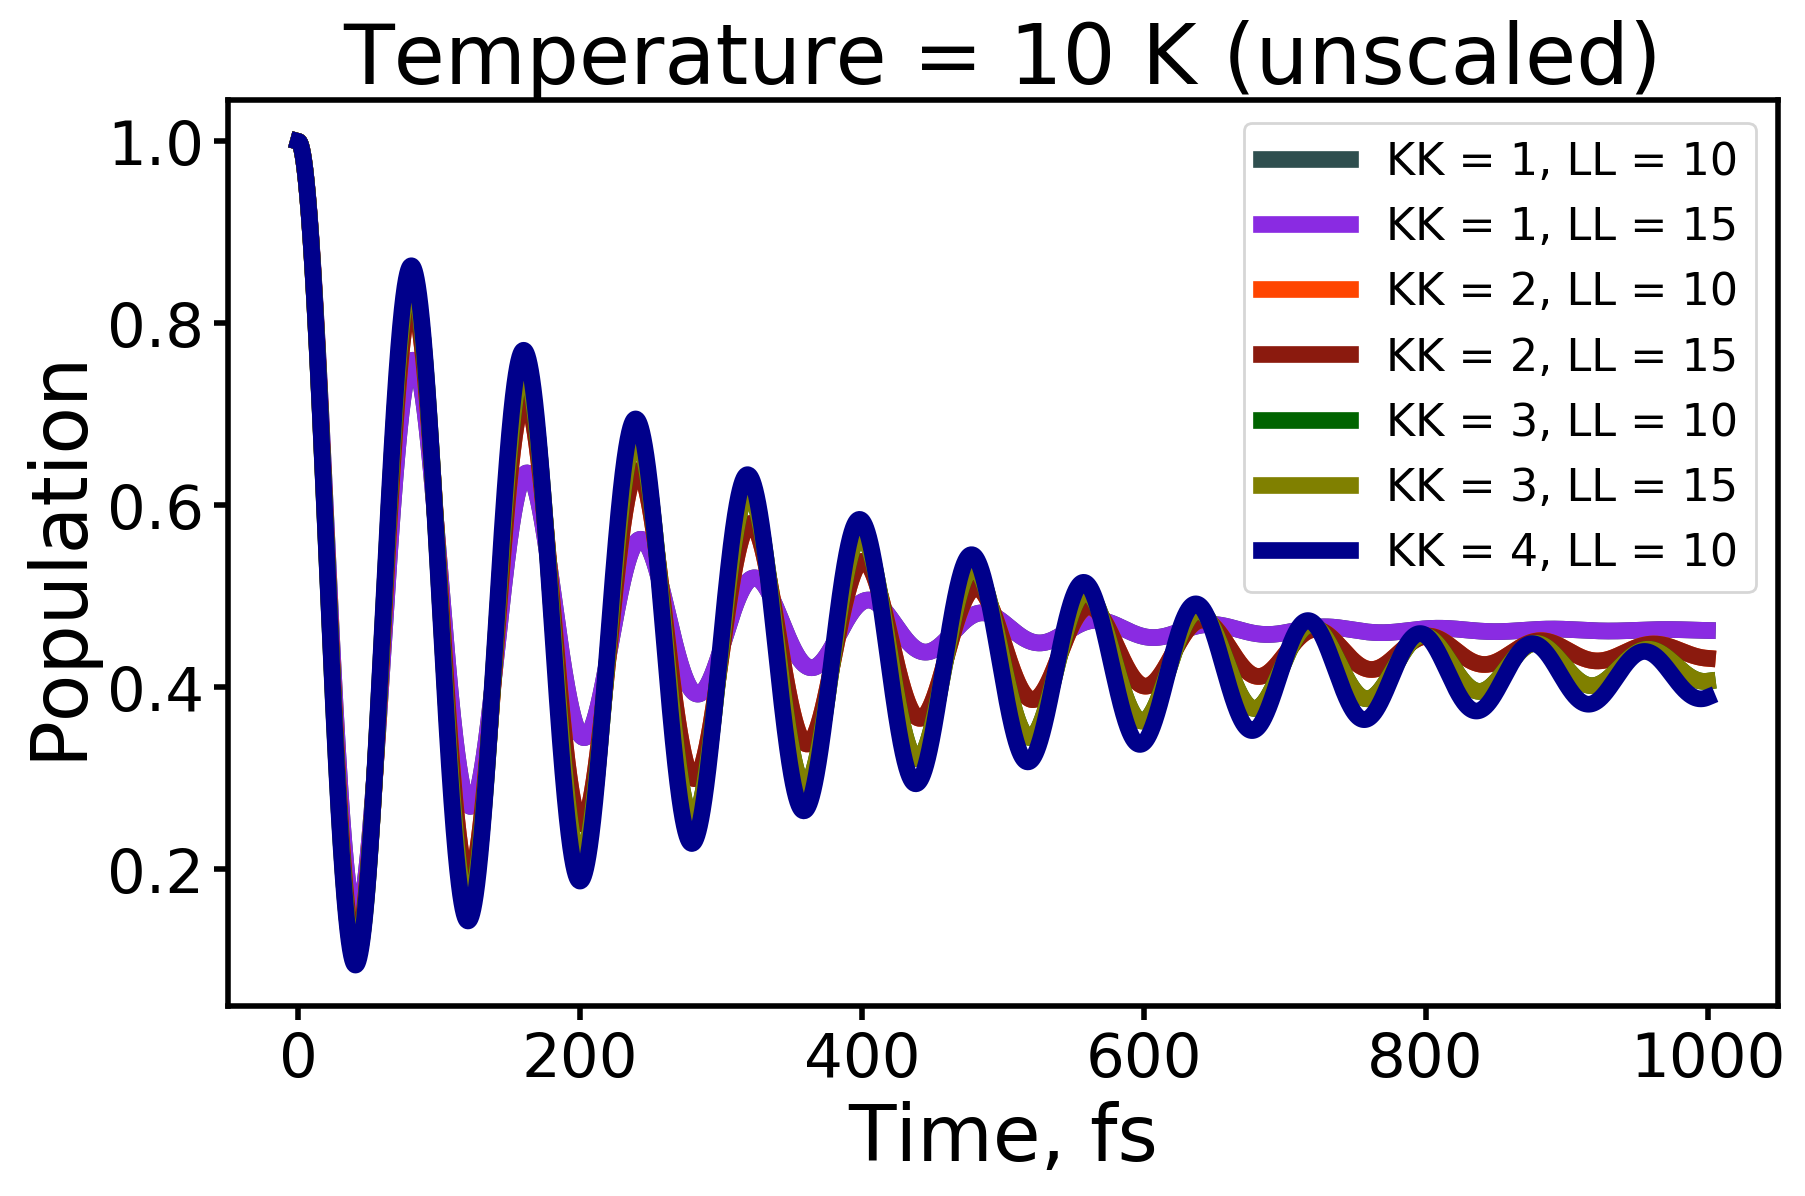

In [9]:
A = [ None, None ]

with h5py.File(F"convergence/out_t10_unscaled_KK1_LL10/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"convergence/out_t10_unscaled_KK1_LL15/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 0,0])

C = [ None, None ]

with h5py.File(F"convergence/out_t10_unscaled_KK2_LL10/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 0,0])

D = [ None, None ]

with h5py.File(F"convergence/out_t10_unscaled_KK2_LL15/mem_data.hdf", 'r') as f:
    D[0] = list(f["time/data"][:] * units.au2fs)
    D[1] = list(f["denmat/data"][:, 0,0])

    
E = [ None, None ]

with h5py.File(F"convergence/out_t10_unscaled_KK3_LL10/mem_data.hdf", 'r') as f:
    E[0] = list(f["time/data"][:] * units.au2fs)
    E[1] = list(f["denmat/data"][:, 0,0])
    
F = [ None, None ]

with h5py.File(F"convergence/out_t10_unscaled_KK3_LL15/mem_data.hdf", 'r') as f:
    F[0] = list(f["time/data"][:] * units.au2fs)
    F[1] = list(f["denmat/data"][:, 0,0])

    
G = [ None, None ]

with h5py.File(F"convergence/out_t10_unscaled_KK4_LL10/mem_data.hdf", 'r') as f:
    G[0] = list(f["time/data"][:] * units.au2fs)
    G[1] = list(f["denmat/data"][:, 0,0])

plt.figure(1, figsize=(10, 6), dpi=200)
plt.subplot(1,1,1)
ax = plt.gca()
plt.title('Temperature = 10 K (unscaled)', fontsize=30)
plt.xlabel('Time, fs',fontsize=28)
plt.ylabel('Population',fontsize=28)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(length=5, width=2, labelsize=22)
plt.plot(A[0], A[1], label="KK = 1, LL = 10", linewidth=6, color = colors["41"])
plt.plot(B[0], B[1], label="KK = 1, LL = 15", linewidth=6, color = colors["31"])
plt.plot(C[0], C[1], label="KK = 2, LL = 10", linewidth=6, color = colors["12"])
plt.plot(D[0], D[1], label="KK = 2, LL = 15", linewidth=6, color = colors["11"])
plt.plot(E[0], E[1], label="KK = 3, LL = 10", linewidth=6, color = colors["22"])
plt.plot(F[0], F[1], label="KK = 3, LL = 15", linewidth=6, color = colors["24"])
plt.plot(G[0], G[1], label="KK = 4, LL = 10", linewidth=6, color = colors["32"])
plt.legend(fontsize=16, loc='upper right')
plt.show()
plt.close()

We compare the calculation timings for the different temperatures and complexities. The times are reported as time per step in ms. The calculations take longer for lower temperature, and as demonstrated in the above plots, the lower temperatures also require a more complex hierarchy to converge which further increases runtime. 

|Hierarchy Parameters| &nbsp;100 K &nbsp;| &nbsp; 50 K &nbsp; | &nbsp; 25 K &nbsp; | &nbsp; 10 K &nbsp; |10 K (unscaled)|Number of ADMs|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|KK = 1, LL = 10|16|17|18|18|5|1001|
|KK = 1, LL = 15|40|18|60|70|19|3876|
|KK = 2, LL = 10|94|119|143|153|38|8008|
|KK = 3, LL = 10|441|581|772|929|282|43758|
|KK = 2, LL = 15|346|439|630|1007|287|54264|
|KK = 4, LL = 10|1211|1399|1693|2060|1191|184756|
|KK = 3, LL = 15|2664|2917|3344|4657|3261|490314|